## **Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Movie url

movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)

for movie_url in url_list:
    print(movie_url)



https://www.justwatch.com/in/movie/saiyaara
https://www.justwatch.com/in/movie/raid-2-2025
https://www.justwatch.com/in/movie/jurassic-world-4
https://www.justwatch.com/in/movie/war-2
https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two
https://www.justwatch.com/in/movie/superman-2025
https://www.justwatch.com/in/movie/f1
https://www.justwatch.com/in/movie/materialists
https://www.justwatch.com/in/movie/sitaare-zameen-par
https://www.justwatch.com/in/movie/365-days
https://www.justwatch.com/in/movie/gagana-maargan
https://www.justwatch.com/in/movie/housefull-5
https://www.justwatch.com/in/movie/vash
https://www.justwatch.com/in/movie/mon-potongo
https://www.justwatch.com/in/movie/coolie-2025
https://www.justwatch.com/in/movie/maareesan
https://www.justwatch.com/in/movie/vd12
https://www.justwatch.com/in/movie/thunderbolts
https://www.justwatch.com/in/movie/chaava
https://www.justwatch.com/in/movie/weapons-2025
https://www.justwatch.com/in/movie/tehran-2023
http

## **Scrapping Movie Title**

In [ ]:
import requests
from bs4 import BeautifulSoup

# Function to fetch and parse HTML from a URL
def fetch_soup(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return BeautifulSoup(response.text, 'html.parser')
    else:
        print(f"Failed to retrieve {url}, status code: {response.status_code}")
        return None

# Get the main movies page and extract movie URLs
main_url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_soup(main_url)

movie_urls = []
if soup:
    movie_links = soup.find_all('a', href=True)
    movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
    url_list = ['https://www.justwatch.com' + x for x in movie_urls]
else:
    url_list = []

#  Loop through each movie URL to extract and store title:url in dict
Movie_title = {}

for movie_url in url_list:
    movie_soup = fetch_soup(movie_url)
    if movie_soup:
        title_tag = movie_soup.find('h1', class_='title-detail-hero__details__title')
        if title_tag:
            # Extract only direct text (ignore nested span)
            title = title_tag.find(string=True, recursive=False).strip()
            Movie_title[title] = movie_url
        else:
            Movie_title["Title not found"] = movie_url

# Print the resulting dictionary
for title, url in Movie_title.items():
    print(f"{title}: {url}")


Saiyaara: https://www.justwatch.com/in/movie/saiyaara
Mahavatar Narsimha: https://www.justwatch.com/in/movie/raid-2-2025
Jurassic World: Rebirth: https://www.justwatch.com/in/movie/jurassic-world-4
War 2: https://www.justwatch.com/in/movie/war-2
Mission: Impossible - The Final Reckoning: https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two
Superman: https://www.justwatch.com/in/movie/superman-2025
F1: https://www.justwatch.com/in/movie/f1
Materialists: https://www.justwatch.com/in/movie/materialists
Sitaare Zameen Par: https://www.justwatch.com/in/movie/sitaare-zameen-par
365 Days: https://www.justwatch.com/in/movie/365-days
Maargan: https://www.justwatch.com/in/movie/gagana-maargan
Housefull 5: https://www.justwatch.com/in/movie/housefull-5
Vash: https://www.justwatch.com/in/movie/vash
Mon Potongo: https://www.justwatch.com/in/movie/mon-potongo
Coolie: https://www.justwatch.com/in/movie/coolie-2025
Maareesan: https://www.justwatch.com/in/movie/maareesan
Kingdo

## **Scrapping release Year**

In [ ]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

movie_release_year = {}

for url in url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        # Extract the release year
        year_span = soup.find("span", class_="release-year")
        release_year = year_span.text.strip("()").strip() if year_span else "Year not found"

        movie_release_year[title] = release_year
    else:
        movie_release_year[url] = f"Failed to retrieve, status code {response.status_code}"

# Print the dictionary of movie titles with their release years
for title, year in movie_release_year.items():
    print(f"{title}: {year}")

Saiyaara: 2025
Mahavatar Narsimha: 2025
Jurassic World: Rebirth: 2025
War 2: 2025
Mission: Impossible - The Final Reckoning: 2025
Superman: 2025
F1: 2025
Materialists: 2025
Sitaare Zameen Par: 2025
365 Days: 2020
Maargan: 2025
Housefull 5: 2025
Vash: 2023
Mon Potongo: 2024
Coolie: 2025
Maareesan: 2025
Kingdom: 2025
Thunderbolts*: 2025
Chhaava: 2025
Weapons: 2025
Tehran: 2025
28 Years Later: 2025
Oho Enthan Baby: 2025
Maa: 2025
Jarann: 2025
Metro in Dino: 2025
Ne Zha: 2019
Children of the Salt: 2017
Lokah Chapter 1: Chandra: 2025
Madrid, 1987: 2012
Thalaivan Thalaivii: 2025
Su from So: 2025
Maalik: 2025
Sister Midnight: 2025
3BHK: 2025
Together: 2025
Ne Zha 2: 2025
How to Train Your Dragon: 2025
Hari Hara Veera Mallu: Part 1 – Sword vs Spirit: 2025
War: 2019
Limitless: 2011
Kuberaa: 2025
Son of Sardaar 2: 2025
Mickey 17: 2025
Karate Kid: Legends: 2025
Dhadak 2: 2025
Param Sundari: 2025
The Fantastic 4: First Steps: 2025
Sinners: 2025
Final Destination Bloodlines: 2025
Mourning Wife: 200

## **Scrapping Genres**

In [ ]:
movie_genres = {}

for url in url_list:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        # Find all poster-detail-infos blocks
        infos = soup.find_all("div", class_="poster-detail-infos")

        genres = "Genres not found"

        for info in infos:
            # genres are stored in the h3 heading inside class_="poster-detail-infos__subheading block
            heading = info.find("h3", class_="poster-detail-infos__subheading")
            if heading and heading.get_text(strip=True) == "Genres":
                # nested div with class poster-detail-infos__value inside the same block
                value_div = info.find("div", class_="poster-detail-infos__value")
                if value_div:
                    genre_span = value_div.find("span")
                    if genre_span:
                        genres = genre_span.get_text(strip=True)
                break

        #print(genres)
        movie_genres[title] = genres
    else:
        print(f"Failed to retrieve {url}, status: {response.status_code}")

for title, genres in movie_genres.items():
     print(f"{title}:  {genres}")

Saiyaara:  Romance, Drama
Mahavatar Narsimha:  Animation, Action & Adventure, Drama, Fantasy
Jurassic World: Rebirth:  Science-Fiction, Mystery & Thriller, Action & Adventure
War 2:  Mystery & Thriller, Action & Adventure
Mission: Impossible - The Final Reckoning:  Action & Adventure, Mystery & Thriller
Superman:  Science-Fiction, Action & Adventure, Fantasy
F1:  Action & Adventure, Drama, Sport
Materialists:  Romance, Drama, Comedy
Sitaare Zameen Par:  Drama, Sport, Comedy
365 Days:  Drama, Romance, Made in Europe
Maargan:  Crime, Mystery & Thriller
Housefull 5:  Comedy, Mystery & Thriller
Vash:  Mystery & Thriller, Horror
Mon Potongo:  Drama, Romance
Coolie:  Action & Adventure, Mystery & Thriller, Crime
Maareesan:  Mystery & Thriller, Drama, Action & Adventure, Comedy
Kingdom:  Action & Adventure, Drama, Mystery & Thriller
Thunderbolts*:  Crime, Drama, Fantasy, Science-Fiction, Action & Adventure
Chhaava:  History, Action & Adventure, Drama
Weapons:  Horror, Mystery & Thriller
Tehra

## **Scrapping IMBD Rating**

In [ ]:

movie_rating = {}  # Dictionary to store title: rating pairs

for url in url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        # Extract the IMDb rating
        rating_span = soup.find("span", class_="imdb-score")
        if rating_span:
            imdb_text = rating_span.get_text(strip=True)
            match = re.search(r"\d+(\.\d+)?", imdb_text)
            rating = float(match.group(0)) if match else None
        else:
            rating = None

        movie_rating[title] = rating
    else:
        movie_rating[url] = None

# Print the movie titles with their ratings
for title, rating in movie_rating.items():
    print(f"{title} : {rating}")


Saiyaara : 10.0
Mahavatar Narsimha : 9.1
Jurassic World: Rebirth : 5.9
War 2 : 5.9
Mission: Impossible - The Final Reckoning : 7.3
Superman : 7.3
F1 : 7.8
Materialists : 6.4
Sitaare Zameen Par : 6.9
365 Days : 3.3
Maargan : 6.8
Housefull 5 : 3.4
Vash : 7.9
Mon Potongo : 4.7
Coolie : 6.4
Maareesan : 7.5
Kingdom : 5.6
Thunderbolts* : 7.2
Chhaava : 7.3
Weapons : 7.8
Tehran : 6.4
28 Years Later : 6.7
Oho Enthan Baby : 6.5
Maa : 5.0
Jarann : 7.0
Metro in Dino : 7.0
Ne Zha : 7.3
Children of the Salt : 5.9
Lokah Chapter 1: Chandra : 8.3
Madrid, 1987 : 6.2
Thalaivan Thalaivii : 5.9
Su from So : 8.5
Maalik : 6.3
Sister Midnight : 5.8
3BHK : 7.3
Together : 6.8
Ne Zha 2 : 8.0
How to Train Your Dragon : 7.8
Hari Hara Veera Mallu: Part 1 – Sword vs Spirit : 5.9
War : 6.6
Limitless : 7.4
Kuberaa : 6.4
Son of Sardaar 2 : 5.1
Mickey 17 : 6.7
Karate Kid: Legends : 6.3
Dhadak 2 : 7.1
Param Sundari : 6.8
The Fantastic 4: First Steps : 7.3
Sinners : 7.6
Final Destination Bloodlines : 6.8
Mourning Wife : 5

## **Scrapping Runtime/Duration**

In [ ]:
import re

Movie_Runtime = {}  # store all runtimes

for url in url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        # Find the block containing runtime text
        runtime_tag = soup.find("div", class_="hidden-horizontal-scrollbar__items")
        if runtime_tag:
            all_text = runtime_tag.get_text(strip=True)
            # Regex to find runtime like '2h 17min', '1h', or '98min'
            match = re.search(r"\d+\s*h\s*\d*\s*min|\d+\s*h|\d+\s*min", all_text)
            if match:
                runtime = match.group(0)

            else:
                runtime = "Runtime not found"
        else:
            runtime = "Runtime not found"
        Movie_Runtime[title] = runtime
    else:
        Movie_Runtime[url] = f"Failed to retrieve (status {response.status_code})"

    #Runtime_list.append(runtime, title)

for title, runtime in Movie_Runtime.items():
    print(f"{title} : {runtime}")



Saiyaara : 2h 36min
Mahavatar Narsimha : 2h 10min
Jurassic World: Rebirth : 2h 13min
War 2 : 2h 53min
Mission: Impossible - The Final Reckoning : 2h 54min
Superman : 2h 10min
F1 : 2h 35min
Materialists : 1h 56min
Sitaare Zameen Par : 2h 35min
365 Days : 1h 54min
Maargan : 2h 12min
Housefull 5 : 2h 43min
Vash : 1h 57min
Mon Potongo : 2h 29min
Coolie : 2h 50min
Maareesan : 2h 32min
Kingdom : 2h 38min
Thunderbolts* : 2h 7min
Chhaava : 2h 41min
Weapons : 2h 9min
Tehran : 1h 55min
28 Years Later : 1h 55min
Oho Enthan Baby : 2h 10min
Maa : 2h 13min
Jarann : 2h 5min
Metro in Dino : 2h 42min
Ne Zha : 1h 50min
Children of the Salt : 1h 43min
Lokah Chapter 1: Chandra : 2h 31min
Madrid, 1987 : 1h 44min
Thalaivan Thalaivii : 2h 20min
Su from So : 2h 15min
Maalik : 2h 32min
Sister Midnight : 1h 47min
3BHK : 2h 19min
Together : 1h 42min
Ne Zha 2 : 2h 24min
How to Train Your Dragon : 2h 5min
Hari Hara Veera Mallu: Part 1 – Sword vs Spirit : 2h 41min
War : 2h 32min
Limitless : 1h 45min
Kuberaa : 3h 5m

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here


Age_Rating_list = {}  # store all extracted values

for url in url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        rating_tag = soup.find("div", class_="hidden-horizontal-scrollbar__items")
        if rating_tag:
            all_text = rating_tag.get_text(strip=True)
            # This will extract character(s) before 'Age rating'
            match = re.search(r'([A-Za-z0-9\+]+)\s*Age rating', all_text)
            if match:
                # group(1) is the value before 'Age rating'
                age_rating = match.group(1)
            else:
                age_rating = "Age Rating not found"
        else:
            age_rating = "Tag not found"
        Age_Rating_list[title]= age_rating
    else:
        Age_Rating_list[url] = f"Failed to retrieve (status {response.status_code})"


# Print all values
for title, age_rating in Age_Rating_list.items():
    print(f"{title} : {age_rating}")


Saiyaara : UA16+
Mahavatar Narsimha : UA13+
Jurassic World: Rebirth : UA13+
War 2 : UA16+
Mission: Impossible - The Final Reckoning : UA13+
Superman : UA13+
F1 : UA16+
Materialists : A
Sitaare Zameen Par : UA13+
365 Days : A
Maargan : UA13+
Housefull 5 : UA16+
Vash : A
Mon Potongo : A
Coolie : A
Maareesan : UA13+
Kingdom : UA16+
Thunderbolts* : UA13+
Chhaava : A
Weapons : A
Tehran : UA16+
28 Years Later : A
Oho Enthan Baby : UA16+
Maa : UA16+
Jarann : UA16+
Metro in Dino : UA16+
Ne Zha : Age Rating not found
Children of the Salt : Age Rating not found
Lokah Chapter 1: Chandra : UA16+
Madrid, 1987 : Age Rating not found
Thalaivan Thalaivii : UA13+
Su from So : UA16+
Maalik : A
Sister Midnight : A
3BHK : U
Together : A
Ne Zha 2 : UA7+
How to Train Your Dragon : UA7+
Hari Hara Veera Mallu: Part 1 – Sword vs Spirit : UA16+
War : UA
Limitless : A
Kuberaa : UA16+
Son of Sardaar 2 : UA13+
Mickey 17 : A
Karate Kid: Legends : UA13+
Dhadak 2 : UA16+
Param Sundari : UA13+
The Fantastic 4: First S

## **Fetching Production Countries Details**

In [ ]:
movie_production_country = {}

for url in url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        production_country = "Country not found"
        infos = soup.find_all("div", class_="poster-detail-infos")
        for info in infos:
            heading = info.find("h3", class_="poster-detail-infos__subheading")
            if heading and heading.get_text(strip=True).lower() == "production country":
                value_div = info.find("div", class_="poster-detail-infos__value")
                if value_div:
                    production_country = value_div.get_text(strip=True)
                break

        # Add to dictionary
        movie_production_country[title] = production_country
    else:
        movie_production_country[url] = f"Failed to retrieve (status {response.status_code})"

for title, country in movie_production_country.items():
    print(f"{title}:  {country}")


Saiyaara:  India
Mahavatar Narsimha:  India
Jurassic World: Rebirth:  United Kingdom, Malta, India, Taiwan, United States
War 2:  India
Mission: Impossible - The Final Reckoning:  United States
Superman:  United States
F1:  United States
Materialists:  United States, Finland
Sitaare Zameen Par:  India
365 Days:  Poland
Maargan:  India
Housefull 5:  India, United Kingdom
Vash:  India
Mon Potongo:  India
Coolie:  India
Maareesan:  India
Kingdom:  India
Thunderbolts*:  United States, Australia, Canada
Chhaava:  India
Weapons:  United States
Tehran:  India
28 Years Later:  United States, Canada, United Kingdom
Oho Enthan Baby:  India
Maa:  India
Jarann:  India
Metro in Dino:  India
Ne Zha:  China
Children of the Salt:  Venezuela
Lokah Chapter 1: Chandra:  India
Madrid, 1987:  Spain
Thalaivan Thalaivii:  India
Su from So:  India
Maalik:  India
Sister Midnight:  United Kingdom, India, Sweden
3BHK:  India
Together:  United States, Australia
Ne Zha 2:  China
How to Train Your Dragon:  United S

## **Fetching Streaming Service Details**

In [ ]:
import requests
from bs4 import BeautifulSoup

Movie_streaming_Platform= {}  # store providers from all URLs

for url in url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Extract the movie title
        title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        # Find all offer-container blocks
        offer_blocks = soup.find_all("span", class_="offer-container")

        platform = []  # platform for this URL only
        for block in offer_blocks:
            img_tag = block.find("img", class_="provider-icon")
            if img_tag and img_tag.has_attr("title"):
                platform.append(img_tag["title"])


        if platform:
          Movie_streaming_Platform[title] = platform
        else:
          Movie_streaming_Platform[title] = ["Not available for streaming"]

for title, platform in Movie_streaming_Platform.items():
    print(f"Title: {title}")
    print("Movie_streaming_Platform:", platform, "\n")


Title: Saiyaara
Movie_streaming_Platform: ['Not available for streaming'] 

Title: Mahavatar Narsimha
Movie_streaming_Platform: ['Bookmyshow'] 

Title: Jurassic World: Rebirth
Movie_streaming_Platform: ['Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Apple TV', 'Bookmyshow'] 

Title: War 2
Movie_streaming_Platform: ['Bookmyshow'] 

Title: Mission: Impossible - The Final Reckoning
Movie_streaming_Platform: ['Apple TV', 'Zee5', 'Apple TV', 'Apple TV'] 

Title: Superman
Movie_streaming_Platform: ['Apple TV', 'Apple TV', 'Amazon Video', 'Apple TV', 'Bookmyshow'] 

Title: F1
Movie_streaming_Platform: ['Apple TV', 'Apple TV', 'Amazon Video', 'Apple TV', 'Bookmyshow'] 

Title: Materialists
Movie_streaming_Platform: ['Apple TV', 'Zee5', 'Apple TV', 'Apple TV'] 

Title: Sitaare Zameen Par
Movie_streaming_Platform: ['Not available for streaming'] 

Title: 365 Days
Movie_streaming_Platform: ['Netflix'] 

Title: Maargan
Movie_streaming_Platform: ['Amazon Prime Video', 'Amazon Prime Video with Ads

## **Now Creating Movies DataFrame**

In [ ]:
import pandas as pd


# Combine all into one
final_movie_dict = {}

# collect all titles across dictionaries
all_titles = set(
    list(Movie_title.keys())
    + list(movie_release_year.keys())
    + list(movie_genres.keys())
    + list(movie_rating.keys())
    + list(Movie_Runtime.keys())
    + list(Age_Rating_list.keys())
    + list(movie_production_country.keys())
    + list(Movie_streaming_Platform.keys())
)

for title in all_titles:
    final_movie_dict[title] = {
        "title": title,
        "release_year": movie_release_year.get(title, "N/A"),
        "genres": ", ".join(movie_genres.get(title, [])) if isinstance(movie_genres.get(title), list) else movie_genres.get(title, "N/A"),
        "rating": movie_rating.get(title, "N/A"),
        "runtime": Movie_Runtime.get(title, "N/A"),
        "age_rating": Age_Rating_list.get(title, "N/A"),
        "country": movie_production_country.get(title, "N/A"),
        "platforms": ", ".join(Movie_streaming_Platform.get(title, [])) if isinstance(Movie_streaming_Platform.get(title), list) else Movie_streaming_Platform.get(title, "N/A"),
        "url": Movie_title.get(title, "N/A")

    }


# Print the  dictionary
import pprint
pprint.pprint(final_movie_dict, width=200)


{'28 Days Later': {'age_rating': 'A',
                   'country': 'United States, United Kingdom',
                   'genres': 'Drama, Horror, Science-Fiction, Mystery & Thriller',
                   'platforms': 'Apple TV, Amazon Prime Video, Sony Pictures Amazon Channel, Amazon Prime Video with Ads, Amazon Video, Apple TV, Apple TV',
                   'rating': 7.5,
                   'release_year': '2002',
                   'runtime': '1h 53min',
                   'title': '28 Days Later',
                   'url': 'https://www.justwatch.com/in/movie/28-days-later'},
 '28 Years Later': {'age_rating': 'A',
                    'country': 'United States, Canada, United Kingdom',
                    'genres': 'Horror, Science-Fiction, Mystery & Thriller',
                    'platforms': 'Apple TV, Zee5, Amazon Video, Apple TV, Apple TV',
                    'rating': 6.7,
                    'release_year': '2025',
                    'runtime': '1h 55min',
                    '

In [ ]:
#Create Data Frame
df_Movie = pd.DataFrame.from_dict(final_movie_dict, orient="index")
df_Movie.reset_index(drop=True, inplace=True)
df_Movie

title release_year  \
0                   Thunderbolts*         2025   
1                   Mourning Wife         2001   
2                Son of Sardaar 2         2025   
3              Bhaag Milkha Bhaag         2013   
4                     Jolly LLB 3         2025   
..                            ...          ...   
100                       Maargan         2025   
101                      The Maid         2014   
102                    Aashiqui 2         2013   
103                           Maa         2025   
104  Final Destination Bloodlines         2025   

                                                genres  rating  \
0    Crime, Drama, Fantasy, Science-Fiction, Action...     7.2   
1                                       Romance, Drama     5.5   
2                                        Drama, Comedy     5.1   
3                                History, Drama, Sport     8.2   
4                                        Comedy, Drama     NaN   
..                                                 ...     ...   
100                          Crime, Mystery & Thriller     6.8   
101                                     Drama, Romance     4.4   
102                    Drama, Romance, Music & Musical     7.1   
103                                             Horror     5.0   
104                                             Horror     6.8   

               runtime            age_rating  \
0              2h 7min                 UA13+   
1              1h 0min  Age Rating not found   
2             2h 22min                 UA13+   
3              3h 6min                     U   
4    Runtime not found  Age Rating not found   
..                 ...                   ...   
100           2h 12min                 UA13+   
101           1h 39min  Age Rating not found   
102           2h 12min                     U   
103           2h 13min                 UA16+   
104           1h 50min                     A   

                              country  \
0    United States, Australia, Canada   
1                               Japan   
2                               India   
3                               India   
4                               India   
..                                ...   
100                             India   
101                    United Kingdom   
102                             India   
103                             India   
104                     United States   

                                             platforms  \
0                                           JioHotstar   
1                             JustWatchTV, Plex Player   
2                                           Bookmyshow   
3                         Apple TV, Apple TV, Apple TV   
4                          Not available for streaming   
..                                                 ...   
100  Amazon Prime Video, Amazon Prime Video with Ad...   
101                                        JustWatchTV   
102                        Not available for streaming   
103                                Netflix, Bookmyshow   
104         Apple TV, Apple TV, Amazon Video, Apple TV   

                                                   url  
0      https://www.justwatch.com/in/movie/thunderbolts  
1     https://www.justwatch.com/in/movie/mourning-wife  
2    https://www.justwatch.com/in/movie/son-of-sard...  
3    https://www.justwatch.com/in/movie/bhaag-milkh...  
4       https://www.justwatch.com/in/movie/jolly-llb-3  
..                                                 ...  
100  https://www.justwatch.com/in/movie/gagana-maargan  
101        https://www.justwatch.com/in/movie/the-maid  
102      https://www.justwatch.com/in/movie/aashiqui-2  
103        https://www.justwatch.com/in/movie/maa-2025  
104  https://www.justwatch.com/in/movie/final-desti...  

[105 rows x 9 columns]

## **Scraping TV  Show Data**

In [ ]:
!pip install bs4
!pip install requests
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }

In [ ]:
import requests
from bs4 import BeautifulSoup

# Function to fetch and parse HTML from a URL
def fetch_tv_soup(tv_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

    response = requests.get(tv_url, headers=headers)
    if response.status_code == 200:
        return  BeautifulSoup(response.text, 'html.parser')
    else:
        print(f"Failed to retrieve {url}, status code: {response.status_code}")
        return None

base_url = 'https://www.justwatch.com'
tv_url = f"{base_url}/in/tv-shows?release_year_from=2000"
tv_soup = fetch_tv_soup(tv_url)
print(tv_soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:


tv_links = tv_soup.find_all('a', href=True)

show_urls = list(set(
    base_url + link['href']
    for link in tv_links if '/tv-show/' in link['href'] and '/season-' not in link['href']
))



#  For each show, fetch season URLs too
tv_show_url = []

for show_url in show_urls:
    try:
        resp = requests.get(show_url, headers=headers)
        if resp.status_code != 200:
            print(f" Failed to fetch {show_url}")
            continue

        detail_soup = BeautifulSoup(resp.text, 'html.parser')

        # Collect base show URL
        tv_show_url.append(show_url)

        # Look for season links
        season_links = detail_soup.find_all('a', href=True)
        for link in season_links:
            href = link['href']
            if href.startswith('/in/tv-show/') and '/season-' in href:
                season_url = base_url + href
                tv_show_url.append(season_url)

    except Exception as e:
        print(f"Error with {show_url}: {e}")

# Remove duplicates
tv_show_urls_list = list(set(tv_show_url))


for url in tv_show_urls_list:
    print(url)


https://www.justwatch.com/in/tv-show/jack-reacher/season-2
https://www.justwatch.com/in/tv-show/upload/season-2
https://www.justwatch.com/in/tv-show/department-q
https://www.justwatch.com/in/tv-show/better-call-saul/season-2
https://www.justwatch.com/in/tv-show/the-rookie/season-6
https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba/season-5
https://www.justwatch.com/in/tv-show/alaska-the-last-frontier/season-9
https://www.justwatch.com/in/tv-show/dawsons-creek/season-2
https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project/season-3
https://www.justwatch.com/in/tv-show/love-is-blind-france/season-1
https://www.justwatch.com/in/tv-show/the-rookie/season-1
https://www.justwatch.com/in/tv-show/splinter-cell-deathwatch/season-1
https://www.justwatch.com/in/tv-show/suzhal-the-vortex/season-2
https://www.justwatch.com/in/tv-show/bigg-boss/season-3
https://www.justwatch.com/in/tv-show/heart-beat
https://www.justwatch.com/in/tv-show/cada-minuto-cuenta/season-2

## **Fetching Tv Show Title details**

In [ ]:
Tv_shows_title_list = []  # Dictionary to store url: title pairs

for tv_url in tv_show_urls_list:
    tv_tag1 = fetch_tv_soup(tv_url)
    if tv_tag1:
        title_tag = tv_tag1.find('h1', class_='title-detail-hero__details__title')
        if title_tag:
            # Case 1: Shows with nested <a><span> and season text after
            link_tag = title_tag.find('a')
            if link_tag:
                # Extract the text inside span (show name)
                span = link_tag.find('span')
                title = span.get_text(strip=True) if span else link_tag.get_text(strip=True)

                # Extract the tail text after </a>, e.g. " - Season 3"
                # It's a NavigableString immediately following the <a>
                next_text = title_tag.find(string=True, recursive=False)
                if next_text:
                    next_text = next_text.strip()
                    title = f"{title} {next_text}".strip()

            else:
                # Case 2: Direct text title (no nested <a>), e.g. "Mayasabha: Rise of the Titans"
                # Extract only direct text ignoring nested spans like release year
                title = title_tag.find(string=True, recursive=False)
                if title:
                    title = title.strip()
                else:
                    title = "NaN/Title Missing"

            Tv_shows_title_list.append(title)
        else:
            Tv_shows_title_list.append("NaN/Title Missing")
    else:
        Tv_shows_title_list.append( "Soup Not Retrieved")

# Print the resulting dictionary
for title in Tv_shows_title_list:
    print(title)


Reacher - Season 2
Upload - Season 2
Dept. Q
Better Call Saul - Season 2
The Rookie - Season 6
Demon Slayer: Kimetsu no Yaiba - Hashira Training
Alaska: The Last Frontier - Season 9
Dawson's Creek - Season 2
The Great Indian Kapil Show - Season 3
Love Is Blind: France - Season 1
The Rookie - Season 1
Splinter Cell: Deathwatch - Season 1
Suzhal - The Vortex - Season 2
Bigg Boss - Season 3
Heart Beat
Every Minute Counts - Season 2
Naruto Shippūden - S6 • Master's Prophecy and Vengeance
Mirzapur
Squid Game - Season 3
Game of Thrones - Season 7
Bigg Boss - Season 7
Mahabharatham - Season 12
Hostage
Heart Beat - Season 1
Modern Family - Season 8
The Rookie - Season 3
Game of Thrones - Season 3
Peaky Blinders - Series 3
Money Heist - Season 3
The Great British Baking Show - Season 13
From - Season 3
Laughter Chefs Unlimited Entertainment
The Twisted Tale of Amanda Knox - Miniseries
The Royals
Mahabharatham - Season 16
The Ba***ds of Bollywood - Season 1
Modern Family - Season 6
Stranger Thin

## **Fetching Release Year**

In [ ]:
tvshow_release_year = []
# Write Your Code here
for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # # Extract the movie title
        # title_tag = soup.find("h1", class_="title-detail-hero__details__title")
        # title = title_tag.find(string=True, recursive=False).strip() if title_tag else "Title not found"

        # Extract the release year
        year_span = soup.find("span", class_="release-year")
        release_year = year_span.text.strip("()").strip() if year_span else "Year not found"

        tvshow_release_year.append(release_year)
    else:
        tvshow_release_year.append("NaN/Title Missing")

for release_year in tvshow_release_year:
    print(release_year)

2022
2022
2025
2016
2024
2024
2019
1998
2025
2025
2018
2025
2025
2009
2024
2025
2009
2018
2025
2017
2013
2014
2025
2024
2016
2021
2013
2016
2019
2022
2024
2024
2025
2025
2014
2025
2014
2019
2025
2020
2025
2012
2018
2018
2025
2025
2025
2024
2022
2010
2025
2014
2012
2025
2014
2014
Year not found
2025
2016
2012
2016
2008
2017
2025
2017
2024
2019
2012
2019
2024
2025
2014
2022
2025
2012
2020
2007
2025
2020
2015
2025
2023
2008
2011
2025
2025
2025
2020
2012
2021
2006
2025
2010
2025
2021
2023
2011
2007
2014
2025
2019
2020
2020
2024
2023
2020
2023
2023
2021
2023
2010
2014
2022
2013
2014
2010
2025
2009
2023
2023
2020
2018
2025
2019
2025
2022
2022
2024
2025
2025
2006
2022
2025
2020
2015
2025
2006
2022
2013
2013
2007
2007
2025
2005
2008
2025
2025
2025
2015
2018
2022
2022
2014
2022
2024
2025
2020
2023
2014
2018
2013
2020
2021
2014
2022
2020
2010
2025
2025
2017
2025
2025
2015
2004
2010
2013
2025
2025
2018
2009
2014
2021
2022
2023
2020
2014
2008
2025
2013
2015
2012
2025
2022
2025
2013
2020
2020
2019


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
tvshow_genres = []

for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        infos = soup.find_all("div", class_="poster-detail-infos")

        genres = "Genres not found"

        for info in infos:
            # genres are stored in the h3 heading inside class_="poster-detail-infos__subheading block
            heading = info.find("h3", class_="poster-detail-infos__subheading")
            if heading and heading.get_text(strip=True) == "Genres":
                # Find the nested div with class poster-detail-infos__value inside the same block
                value_div = info.find("div", class_="poster-detail-infos__value")
                if value_div:
                    genre_span = value_div.find("span")
                    if genre_span:
                        genres = genre_span.get_text(strip=True)
                break  # Stop after finding the genres block

        #print(genres)
        tvshow_genres.append(genres)
    else:
        print(f"Failed to retrieve {url}, status: {response.status_code}")

for genres in tvshow_genres:
     print(genres)

Action & Adventure, Drama, Crime, Mystery & Thriller
Science-Fiction, Comedy, Drama
Drama, Crime, Mystery & Thriller
Crime, Drama
Crime, Drama, Comedy, Action & Adventure
Animation, Action & Adventure, Science-Fiction, Fantasy, Mystery & Thriller
Reality TV
Drama, Romance
Comedy
Reality TV
Crime, Drama, Comedy, Action & Adventure
Animation, Action & Adventure, Science-Fiction, Mystery & Thriller
Crime, Mystery & Thriller, Drama, Fantasy
Reality TV
Drama
Drama
Animation, Action & Adventure, Science-Fiction, Comedy, Drama, Fantasy
Drama, Action & Adventure, Crime, Mystery & Thriller
Mystery & Thriller, Drama, Action & Adventure, Crime
Action & Adventure, Science-Fiction, Drama, Fantasy
Reality TV
Drama, Kids & Family, History, War & Military
Drama, Mystery & Thriller, War & Military
Drama
Comedy, Drama, Romance
Crime, Drama, Comedy, Action & Adventure
Action & Adventure, Science-Fiction, Drama, Fantasy
Drama, Crime
Mystery & Thriller, Action & Adventure, Crime, Drama, Made in Europe
Real


## **Fetching IMDB Rating Details**

In [ ]:
tvshow_imdb_rating = []
# Write Your Code here

for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

          # Extract the IMDb rating
        rating_span = soup.find("span", class_="imdb-score")
        if rating_span:
            imdb_text = rating_span.get_text(strip=True)
            match = re.search(r"\d+(\.\d+)?", imdb_text)
            rating = float(match.group(0)) if match else None
        else:
            rating = None

        tvshow_imdb_rating.append(rating)
    else:
        tvshow_imdb_rating.append("NaN")

# Print the movie titles with their ratings
for rating in tvshow_imdb_rating:
    print(rating)



8.0
7.8
8.2
9.0
8.0
8.6
7.6
6.8
6.4
None
8.0
None
8.1
3.6
8.4
7.1
8.7
8.4
8.0
9.2
3.6
9.0
6.5
8.4
8.5
8.0
9.2
8.7
8.2
8.6
7.8
8.7
5.6
4.3
9.0
None
8.5
8.6
8.2
9.2
6.5
8.5
3.6
8.2
6.6
3.6
8.3
8.3
8.3
8.7
4.9
8.9
9.2
8.2
8.9
8.7
8.0
8.9
8.6
8.1
8.7
8.3
8.2
None
8.5
5.6
8.0
7.7
8.5
8.0
6.6
8.5
8.6
4.3
8.5
3.6
8.7
None
7.8
8.5
None
7.7
9.5
8.7
5.2
6.8
None
6.4
8.6
6.2
3.6
8.1
8.4
None
8.1
6.2
8.5
8.6
8.1
None
8.4
8.6
6.8
8.3
8.5
8.1
7.6
8.5
8.0
8.5
8.5
8.7
8.6
8.5
9.0
8.1
8.6
8.5
8.5
5.5
6.6
8.4
6.5
3.6
7.6
7.6
8.3
8.6
5.8
5.2
8.6
6.4
8.3
8.7
9.0
8.0
3.6
8.0
9.0
8.7
8.7
8.7
9.2
8.4
3.6
None
7.1
6.5
8.9
9.1
7.6
8.0
9.0
7.7
8.3
8.3
8.2
7.3
8.7
9.0
9.0
6.6
7.6
8.4
6.5
6.5
9.5
7.6
7.3
8.3
6.2
9.0
8.7
8.3
8.5
9.0
7.6
None
8.4
8.4
8.9
8.0
8.1
4.9
9.0
9.0
8.7
None
8.1
9.2
8.7
None
9.0
None
8.7
8.2
6.8
8.6
8.4
8.5
8.7
8.6
8.7
None
8.5
8.3
8.7
7.7
8.5
8.1
None
8.6
8.6
8.4
6.3
8.7
8.3
None
8.7
8.2
8.7
8.6
8.0
3.6
7.3
8.6
7.6
8.4
6.6
8.7
None
8.3
8.6
8.6
8.6
9.0
8.1
8.4
8.0
8.3
8.7
8.1
None
8.3
8.0
8

## **Fetching Age Rating Details**

In [ ]:


tvshow_Age_Rating_list = []  # store all extracted values

for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        rating_tag = soup.find("div", class_="hidden-horizontal-scrollbar__items")
        if rating_tag:
            all_text = rating_tag.get_text(strip=True)
            # This will extract character(s) before 'Age rating'
            match = re.search(r'([A-Za-z0-9\+]+)\s*Age rating', all_text)
            if match:
                # group(1) is the value before 'Age rating'
                age_rating = match.group(1)
            else:
                age_rating = "NaN"
        else:
            age_rating = "Tag not found"
        tvshow_Age_Rating_list.append(age_rating)
    else:
        tvshow_Age_Rating_list.append(f"Failed to retrieve (status {response.status_code})")


# Print all values
for tvshowage_rating in tvshow_Age_Rating_list:
    print(tvshowage_rating)



A
UA16+
A
A
UA16+
UA16+
U
NaN
UA13+
NaN
UA16+
NaN
UA16+
UA16+
NaN
NaN
U
A
A
A
UA16+
U
NaN
NaN
UA13+
UA16+
A
A
UA16+
U
NaN
NaN
NaN
A
U
NaN
UA13+
UA16+
UA
U
A
UA13+
UA16+
NaN
A
UA16+
UA16+
A
A
U
A
U
A
NaN
U
U
NaN
NaN
UA16+
U
U
U
NaN
NaN
A
NaN
UA16+
NaN
A
A
UA7+
A
A
A
UA16+
UA16+
U
NaN
A
A
NaN
UA16+
A
U
A
NaN
NaN
NaN
A
A
UA16+
NaN
UA16+
NaN
U
A
UA13+
A
U
NaN
UA16+
NaN
NaN
UA16+
A
NaN
A
A
UA16+
UA16+
UA13+
U
UA16+
A
U
U
UA16+
UA13+
A
NaN
NaN
A
NaN
UA16+
A
U
UA16+
A
UA13+
A
A
NaN
A
UA16+
A
UA16+
UA16+
UA16+
U
A
U
U
A
NaN
UA16+
NaN
UA13+
UA16+
U
NaN
A
A
U
A
UA13+
UA16+
NaN
UA16+
A
A
U
NaN
A
UA16+
NaN
NaN
A
NaN
UA16+
U
NaN
UA16+
NaN
U
UA16+
U
A
NaN
UA16+
UA16+
U
A
UA16+
A
A
U
U
NaN
U
A
U
NaN
UA16+
UA13+
A
NaN
NaN
UA16+
UA16+
UA13+
A
UA16+
UA16+
NaN
UA16+
UA16+
UA16+
UA16+
UA16+
U
NaN
UA16+
A
NaN
NaN
NaN
UA16+
NaN
U
UA16+
NaN
UA16+
A
UA16+
UA16+
UA16+
A
UA16+
NaN
A
NaN
UA16+
A
NaN
A
U
NaN
NaN
NaN
U
UA16+
U
NaN
U
A
UA16+
U
NaN
A
A
UA16+
UA16+
U
UA16+
NaN
U
NaN
UA
A
UA16+
U
A
A
UA16+
U
A
UA16+
A

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
tvshow_production_country = []

for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        production_country = "Country not found"
        infos = soup.find_all("div", class_="poster-detail-infos")
        for info in infos:
            heading = info.find("h3", class_="poster-detail-infos__subheading")
            if heading and heading.get_text(strip=True).lower() == "production country":
                value_div = info.find("div", class_="poster-detail-infos__value")
                if value_div:
                    production_country = value_div.get_text(strip=True)
                break
        tvshow_production_country.append(production_country)
    else:
        tvshow_production_country.append(f"Failed to retrieve (status {response.status_code})",url)

for country in tvshow_production_country:
    print(country)


United States
United States
United Kingdom, United States
United States
United States
Japan
United States
United States
India
France
United States
United States
India
India
India
Mexico
Japan
India
South Korea
United States
India
India, United States
United Kingdom
India
United States
United States
United States
United Kingdom
Spain
United Kingdom
United States
India
United States
India
India, United States
India
United States
United States
United Kingdom
India
India
United States
India
Japan
India
India
Japan
United States
United States
Japan
South Africa
United States
United States
India
United States
Japan
India
Japan
United States
United States
Japan
United States
Japan
Argentina
Canada
United Kingdom
United States
South Korea
Canada
South Korea
United Kingdom
Canada
United States
India
United States
India
Japan
United States
Japan
Canada
South Korea
Japan
United States
Japan
Mexico
United States
South Africa
India
United States
United States
India
South Korea
United States
United 

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup

tvshow_streaming_platform= []

for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        # Find all offer-container blocks
        offer_blocks = soup.find_all("span", class_="offer-container")

        platform = []  # platform for this URL only
        for block in offer_blocks:
            img_tag = block.find("img", class_="provider-icon")
            if img_tag and img_tag.has_attr("title"):
                platform.append(img_tag["title"])
        if platform:
          tvshow_streaming_platform.append(platform)
        else:
          tvshow_streaming_platform.append("Not available for streaming")

for platform in tvshow_streaming_platform:
    print(platform)



['Amazon Prime Video', 'Amazon Prime Video with Ads']
['Amazon Prime Video', 'Amazon Prime Video with Ads']
['Netflix']
['Netflix']
['Netflix']
Not available for streaming
Not available for streaming
Not available for streaming
['Netflix']
Not available for streaming
['Netflix']
Not available for streaming
['Amazon Prime Video', 'Amazon Prime Video with Ads']
Not available for streaming
['VI movies and tv']
Not available for streaming
['Crunchyroll', 'Netflix']
['Amazon Prime Video', 'Amazon Prime Video with Ads']
['Netflix']
['JioHotstar']
['JioHotstar', 'JioHotstar']
['JioHotstar']
['Netflix']
['VI movies and tv']
['JioHotstar']
['Netflix']
['JioHotstar', 'VI movies and tv']
['Netflix']
['Netflix']
Not available for streaming
['Amazon Prime Video', 'Amazon Prime Video with Ads']
['JioHotstar', 'JioHotstar']
['JioHotstar']
['Netflix']
['JioHotstar']
Not available for streaming
['JioHotstar']
['Netflix']
['Netflix']
['Sony Liv', 'VI movies and tv']
['Netflix']
['JioHotstar', 'VI movies

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
import re

tvshow_runtime = []

for url in tv_show_urls_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        # Find the block containing runtime text
        runtime_tag = soup.find("div", class_="hidden-horizontal-scrollbar__items")
        if runtime_tag:
            all_text = runtime_tag.get_text(strip=True)
            # Regex to find runtime like '2h 17min', '1h', or '98min'
            match = re.search(r"\d+\s*h\s*\d*\s*min|\d+\s*h|\d+\s*min", all_text)
            if match:
                runtime_show = match.group(0)
                runtime_show+= " per Episode"

            else:
                runtime_show = "Runtime not found"
        else:
            runtime_show = "Runtime not found"
        tvshow_runtime.append(runtime_show)
    else:
        tvshow_runtime.append(f"Failed to retrieve (status {response.status_code})")

for time in tvshow_runtime:
    print(time)



47min per Episode
33min per Episode
54min per Episode
46min per Episode
43min per Episode
29min per Episode
49min per Episode
44min per Episode
1h 2min per Episode
50min per Episode
42min per Episode
Runtime not found
46min per Episode
53min per Episode
22min per Episode
Runtime not found
22min per Episode
50min per Episode
1h 1min per Episode
1h 3min per Episode
57min per Episode
22min per Episode
44min per Episode
22min per Episode
21min per Episode
43min per Episode
56min per Episode
56min per Episode
47min per Episode
1h 0min per Episode
53min per Episode
1h 12min per Episode
52min per Episode
41min per Episode
22min per Episode
Runtime not found
22min per Episode
56min per Episode
57min per Episode
52min per Episode
38min per Episode
22min per Episode
49min per Episode
24min per Episode
50min per Episode
1h 0min per Episode
24min per Episode
1h 4min per Episode
1h 2min per Episode
23min per Episode
32min per Episode
Runtime not found
55min per Episode
45min per Episode
1h 1min per

## **Creating TV Show DataFrame**

In [ ]:
from typing_extensions import dataclass_transform
# Write Your Code here
data_tv_show={
    "Show Title": Tv_shows_title_list,
    "Show Release Year":tvshow_release_year,
    "Show Genres": tvshow_genres,
    "Show Rating": tvshow_imdb_rating,
    "Show Age Category": tvshow_Age_Rating_list,
    "Show Production Country" : tvshow_production_country,
    "Show Streaming Platform": tvshow_streaming_platform,
    "Show Runtime per episode": tvshow_runtime,
    "Show URL": tv_show_urls_list
}

Tv_Shows_df = pd.DataFrame(data_tv_show)
#convert the Show Streaming Platfrom Column data type from list to string
Tv_Shows_df["Show Streaming Platform"] = Tv_Shows_df["Show Streaming Platform"].apply(
    lambda x: ", ".join(map(str, x)) if isinstance(x, list) else str(x)
)

In [ ]:
Tv_Shows_df

Show Title Show Release Year  \
0             Reacher - Season 2              2022   
1              Upload - Season 2              2022   
2                        Dept. Q              2025   
3    Better Call Saul - Season 2              2016   
4          The Rookie - Season 6              2024   
..                           ...               ...   
513    Mahabharatham - Season 14              2014   
514     Supernatural - Season 12              2016   
515        Peacemaker - Season 1              2022   
516     Mahabharatham - Season 6              2013   
517      Hazbin Hotel - Season 2              2025   

                                           Show Genres  Show Rating  \
0    Action & Adventure, Drama, Crime, Mystery & Th...          8.0   
1                       Science-Fiction, Comedy, Drama          7.8   
2                     Drama, Crime, Mystery & Thriller          8.2   
3                                         Crime, Drama          9.0   
4             Crime, Drama, Comedy, Action & Adventure          8.0   
..                                                 ...          ...   
513      Drama, Kids & Family, History, War & Military          9.0   
514  Fantasy, Horror, Mystery & Thriller, Drama, Sc...          8.4   
515  Action & Adventure, Science-Fiction, Drama, Fa...          8.3   
516      Drama, Kids & Family, History, War & Military          9.0   
517  Science-Fiction, Animation, Comedy, Drama, Cri...          7.8   

    Show Age Category        Show Production Country  \
0                   A                  United States   
1               UA16+                  United States   
2                   A  United Kingdom, United States   
3                   A                  United States   
4               UA16+                  United States   
..                ...                            ...   
513                 U           India, United States   
514             UA16+                  United States   
515             UA16+                  United States   
516                 U           India, United States   
517                 A                  United States   

                             Show Streaming Platform Show Runtime per episode  \
0    Amazon Prime Video, Amazon Prime Video with Ads        47min per Episode   
1    Amazon Prime Video, Amazon Prime Video with Ads        33min per Episode   
2                                            Netflix        54min per Episode   
3                                            Netflix        46min per Episode   
4                                            Netflix        43min per Episode   
..                                               ...                      ...   
513                                       JioHotstar        22min per Episode   
514  Amazon Prime Video, Amazon Prime Video with Ads        42min per Episode   
515                                       JioHotstar        43min per Episode   
516                                       JioHotstar        21min per Episode   
517                      Not available for streaming        Runtime not found   

                                              Show URL  
0    https://www.justwatch.com/in/tv-show/jack-reac...  
1    https://www.justwatch.com/in/tv-show/upload/se...  
2    https://www.justwatch.com/in/tv-show/department-q  
3    https://www.justwatch.com/in/tv-show/better-ca...  
4    https://www.justwatch.com/in/tv-show/the-rooki...  
..                                                 ...  
513  https://www.justwatch.com/in/tv-show/mahabhara...  
514  https://www.justwatch.com/in/tv-show/supernatu...  
515  https://www.justwatch.com/in/tv-show/peacemake...  
516  https://www.justwatch.com/in/tv-show/mahabhara...  
517  https://www.justwatch.com/in/tv-show/hazbin-ho...  

[518 rows x 9 columns]

## **Data Filtering & Analysis**

In [ ]:
# Filter Movie data to show only the details of movies that have been released from the year 2023 to 2025 and have a rating higher than 7.0
# Converting the data type of release year and rating to numeric
df_Movie["release_year"] = pd.to_numeric(df_Movie["release_year"], errors="coerce").fillna(0).astype(int)
df_Movie["rating"] = pd.to_numeric(df_Movie["rating"], errors="coerce")

start_date = 2023
end_date = 2025
min_rating = 7.0
filter_Moviedata_df = df_Movie[(df_Movie["release_year"] >= start_date) & (df_Movie["release_year"] <= end_date) & (df_Movie["rating"] >= min_rating)]
filter_Moviedata_df

title  release_year  \
0                                    Thunderbolts*          2025   
11                                        Ne Zha 2          2025   
12                                              F1          2025   
16                                   Soothravakyam          2025   
17                                  Bring Her Back          2025   
19                                         Sinners          2025   
23                                        Superman          2025   
29                        How to Train Your Dragon          2025   
30                                         Weapons          2025   
39                                         Chhaava          2025   
40  Demon Slayer: Kimetsu no Yaiba Infinity Castle          2025   
42                                            Vash          2023   
43                                       Maareesan          2025   
44                                  Sumathi Valavu          2025   
48                                        Dhadak 2          2025   
50                                          Jarann          2025   
51                    The Fantastic 4: First Steps          2025   
57                              Mahavatar Narsimha          2025   
67                                    Vash Level 2          2025   
69       Mission: Impossible - The Final Reckoning          2025   
74                                   Metro in Dino          2025   
77                                      Su from So          2025   
78                                         Santosh          2024   
80                                        Saiyaara          2025   
82                                          Junior          2025   
83                                            3BHK          2025   
88                        Lokah Chapter 1: Chandra          2025   
90                           Quotation Gang Part 1          2024   
96                                  The Wild Robot          2024   

                                               genres  rating   runtime  \
0   Crime, Drama, Fantasy, Science-Fiction, Action...     7.2   2h 7min   
11      Action & Adventure, Animation, Fantasy, Drama     8.0  2h 24min   
12                   Action & Adventure, Drama, Sport     7.8  2h 35min   
16                                              Drama     7.4  1h 48min   
17                                             Horror     7.2  1h 44min   
19  Music & Musical, Mystery & Thriller, Action & ...     7.6  2h 17min   
23       Science-Fiction, Action & Adventure, Fantasy     7.3  2h 10min   
29  Fantasy, Kids & Family, Action & Adventure, Co...     7.8   2h 5min   
30                         Horror, Mystery & Thriller     7.8   2h 9min   
39                 History, Action & Adventure, Drama     7.3  2h 41min   
40  Animation, Action & Adventure, Fantasy, Myster...     8.7  2h 35min   
42                         Mystery & Thriller, Horror     7.9  1h 57min   
43  Mystery & Thriller, Drama, Action & Adventure,...     7.5  2h 32min   
44                                     Horror, Comedy     7.8  2h 21min   
48                 Drama, Romance, Mystery & Thriller     7.1  2h 26min   
50                                      Horror, Drama     7.0   2h 5min   
51   Action & Adventure, Science-Fiction, Documentary     7.3  1h 55min   
57      Animation, Action & Adventure, Drama, Fantasy     9.1  2h 10min   
67                         Mystery & Thriller, Horror     8.0  1h 43min   
69             Action & Adventure, Mystery & Thriller     7.3  2h 54min   
74                             Drama, Romance, Comedy     7.0  2h 42min   
77                                     Comedy, Horror     8.5  2h 15min   
78                   Mystery & Thriller, Crime, Drama     7.1   2h 8min   
80                                     Romance, Drama    10.0  2h 36min   
82                               Drama, Kids & Family     8.3  2h 31min   
83                               Kids & Family, Drama 

In [ ]:
# Filter Movie data to show only the details of movies that have been released from the year 2024 to 2025 and have a rating higher than 8.0
# Converting the data type of release year and rating to numeric
Tv_Shows_df["Show Release Year"] = pd.to_numeric(Tv_Shows_df["Show Release Year"], errors="coerce").fillna(0).astype(int)
Tv_Shows_df["Show Rating"] = pd.to_numeric(Tv_Shows_df["Show Rating"], errors="coerce")

start_date = 2024
end_date = 2025
min_rating = 8.0
filter_TvShowdata_df = Tv_Shows_df[(Tv_Shows_df["Show Release Year"] >= start_date) & (Tv_Shows_df["Show Release Year"] <= end_date) & (Tv_Shows_df["Show Rating"] >= min_rating)]
filter_TvShowdata_df

Show Title  Show Release Year  \
2                                              Dept. Q               2025   
4                                The Rookie - Season 6               2024   
5    Demon Slayer: Kimetsu no Yaiba - Hashira Training               2024   
12                      Suzhal - The Vortex - Season 2               2025   
14                                          Heart Beat               2024   
18                               Squid Game - Season 3               2025   
23                               Heart Beat - Season 1               2024   
31              Laughter Chefs Unlimited Entertainment               2024   
38                        Adolescence - Limited Series               2025   
46                               Dan Da Dan - Season 2               2025   
47                      House of the Dragon - Season 2               2024   
53                               Paatal Lok - Season 2               2025   
57                               Takopi's Original Sin               2025   
69                               Squid Game - Season 2               2024   
91                                      Beyond the Bar               2025   
103                              Dan Da Dan - Season 1               2024   
116                Stranger Things - Stranger Things 5               2025   
127                                The Boys - Season 4               2024   
132                             Slow Horses - Season 5               2025   
135                              The Rookie - Season 7               2025   
142                               Dexter: Resurrection               2025   
154                                        Kaiju No. 8               2024   
155                              Peacemaker - Season 2               2025   
171                               Panchayat - Season 4               2025   
198                                            MobLand               2025   
205                                         Dan Da Dan               2024   
216                                 Half CA - Season 2               2025   
220  The Fragrant Flower Blooms with Dignity - Seas...               2025   
233                                      Solo Leveling               2024   
236                            Helluva Boss - Season 3               2025   
238                 Bonappetit Your Majesty - Season 1               2025   
244                         The White Lotus - Season 3               2025   
254  Laughter Chefs Unlimited Entertainment - Season 2               2025   
257                                        Adolescence               2025   
282   Solo Leveling - Season 2 -Arise from the Shadow-               2025   
304           Mayasabha: Rise of the Titans - Season 1               2025   
308                     True Detective - Night Country               2024   
309                                Mirzapur - Season 3               2024   
321                            SPY x FAMILY - Season 3               2025   
326  Laughter Chefs Unlimited Entertainment - Season 1               2024   
327                                 Reacher - Season 3               2025   
338                             Special Ops - Season 2               2025   
369                   Takopi's Original Sin - Season 1               2025   
372            The Terminal List: Dark Wolf - Season 1               2025   
386            The Fragrant Flower Blooms with Dignity               2025   
394                    Dexter: Resurrection - Season 1               2025   
413                                 Dept. Q - Season 1               2025   
449                             Kaiju No. 8 - Season 1               2024   
463                                 MobLand - Season 1               2025   
464                       The Terminal List: Dark Wolf               2025   
467                          Bob's Burgers - Season 16               2025   
477                           Solo Level

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
# Calculating Movies mean IMDb rating
movie_mean_imdb = df_Movie['rating'].mean()
movie_mean_imdb_rounded = round(movie_mean_imdb, 2)
print("Mean IMDb Rating for Movies is:", movie_mean_imdb_rounded)

# Calculating Tv Shows mean IMDb rating
Tv_Show_mean_imdb = Tv_Shows_df['Show Rating'].mean()
Tv_SHow_mean_imdb_rounded = round(Tv_Show_mean_imdb, 2)
print("Mean IMDb Rating for Tv Shows is:", Tv_SHow_mean_imdb_rounded)

Mean IMDb Rating for Movies is: 6.66
Mean IMDb Rating for Tv Shows is: 7.85


## **Analyzing Top Genres**

In [ ]:
!pip install wordcloud matplotlib numpy Pillow
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
#top 5 Genre of Tv Shows

# Create a list of genres present in the Show Genres column of the TV show data frame. Split by comma and strip spaces
tvshow_genres_list = [p.strip() for row in Tv_Shows_df["Show Genres"] for p in row.split(",")]

TVshow_genre_count = Counter(tvshow_genres_list)

#Converted into data frame for better view
Top5_TV_Genre = pd.DataFrame(TVshow_genre_count.items(), columns=["Genre", "Count"])
Top5_TV_Genre = Top5_TV_Genre.sort_values(by="Count", ascending=False).reset_index(drop=True,  )

#Print Top 5 Tv Show genre
print("Top5_TV_Genre\n", Top5_TV_Genre[:5])

Top5_TV_Genre
                 Genre  Count
0               Drama    423
1  Mystery & Thriller    203
2  Action & Adventure    195
3     Science-Fiction    184
4               Crime    169


In [ ]:

#top 5 genres of Movies

# Create a list of genres present in the genres column of the Movie data frame. Split by comma and strip spaces
movie_genres_list = [p.strip() for row in df_Movie["genres"] for p in row.split(",")]

Movie_genre_count = Counter(movie_genres_list)

#Converted into data frame for better view
Top5_Movie_Genre = pd.DataFrame(Movie_genre_count.items(), columns=["Genre", "Count"])
Top5_Movie_Genre = Top5_Movie_Genre.sort_values(by="Count", ascending=False).reset_index(drop=True,  )

#Print Top 5 Tv Show genre
print("Top5_Movie_Genre\n", Top5_Movie_Genre[:5])

Top5_Movie_Genre
                 Genre  Count
0               Drama     64
1  Action & Adventure     46
2  Mystery & Thriller     38
3              Comedy     25
4               Crime     24


In [ ]:
#Top 5 Genre for combined data

# Concatenated both lists
Genre_list= movie_genres_list + tvshow_genres_list

genre_counts = Counter(Genre_list)

# Step 3: Convert to DataFrame
df_Genre_counts = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"])

# Step 4: Sort by frequency (descending)
df_Genre_counts = df_Genre_counts.sort_values(by="Count", ascending=False).reset_index(drop=True,  )

print("Top5 Genre Combined\n",df_Genre_counts[:5])

Top5 Genre Combined
                 Genre  Count
0               Drama    487
1  Action & Adventure    241
2  Mystery & Thriller    241
3     Science-Fiction    199
4               Crime    193


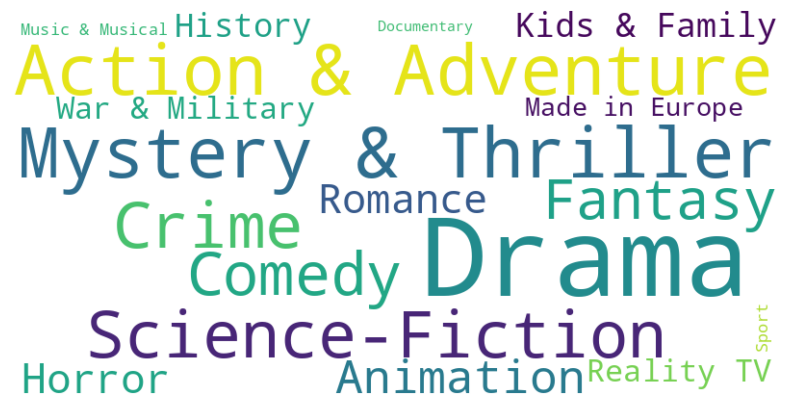

In [ ]:
# Convert to dict {Genre: count}
genre_dict = dict(zip(df_Genre_counts["Genre"], df_Genre_counts["Count"]))

# Generate word cloud
wordcloud_genre = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(genre_dict)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_genre, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
#Top Straming Platform For TV Shows

# Create a list of genres present in the Show Genres column of the TV show data frame. Split by comma and strip spaces
tvshow_streaming_list = [p.strip() for row in Tv_Shows_df["Show Streaming Platform"] for p in row.split(",")]
#top 5 Genre of Tv Shows
TVshow_Streaming_count = Counter(tvshow_streaming_list)


#Converted into data frame for better view
Top5_TV_Show_Streaming_Platform = pd.DataFrame(TVshow_Streaming_count.items(), columns=["Streaming Platfform", "Count"])
Top5_TV_Show_Streaming_Platform  = Top5_TV_Show_Streaming_Platform .sort_values(by="Count", ascending=False).reset_index(drop=True,  )

#Print Top 5 Tv Show genre
print("Top5 TV Show Streaming Platorm\n", Top5_TV_Show_Streaming_Platform[:5])

Top5 TV Show Streaming Platorm
            Streaming Platfform  Count
0                      Netflix    157
1                   JioHotstar    139
2  Not available for streaming    111
3           Amazon Prime Video    108
4  Amazon Prime Video with Ads     70


In [ ]:
#top 5 Streaming Platforms of Movies

# Create a list of genres present in the genres column of the Movie data frame. Split by comma and strip spaces
movie_streaming_list = [p.strip() for row in df_Movie["platforms"] for p in row.split(",")]

Movie_Streaming_count = Counter(movie_streaming_list)
#print(Movie_Streaming_count)

#Converted into data frame for better view
Top5_Movie_Streaming_Platform = pd.DataFrame(Movie_Streaming_count.items(), columns=["Streaming Platform", "Count"])
Top5_Movie_Streaming_Platform = Top5_Movie_Streaming_Platform.sort_values(by="Count", ascending=False).reset_index(drop=True,  )

#Print Top 5 Tv Show Streaming Platforms
print("Top5 Movie Streaming Platform Available\n\n", Top5_Movie_Streaming_Platform[:5])

Top5 Movie Streaming Platform Available

             Streaming Platform  Count
0                     Apple TV     77
1                 Amazon Video     28
2  Not available for streaming     25
3  Amazon Prime Video with Ads     18
4           Amazon Prime Video     18


In [ ]:
#Top 5 Streaming Platforms for combined data

# Concatenated both lists
Streaming_list= movie_streaming_list + tvshow_streaming_list

Streaming_Platorm_counts = Counter(Streaming_list)

# Step 3: Convert to DataFrame
df_Streaming_Platform = pd.DataFrame(Streaming_Platorm_counts.items(), columns=["Streaming Platform", "Count"])

# Step 4: Sort by frequency (descending)
df_Streaming_Platform = df_Streaming_Platform.sort_values(by="Count", ascending=False).reset_index(drop=True,  )

print("Top5 Streaming Platform Combined\n\n",df_Streaming_Platform[:5])

Top5 Streaming Platform Combined

             Streaming Platform  Count
0                      Netflix    175
1                   JioHotstar    148
2  Not available for streaming    136
3           Amazon Prime Video    126
4  Amazon Prime Video with Ads     88


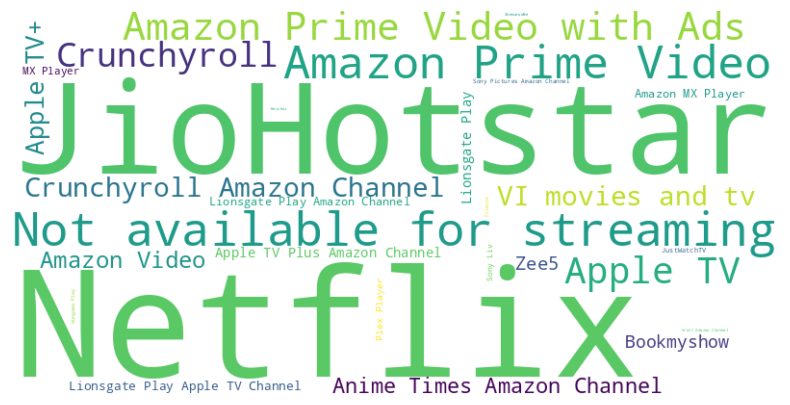

In [ ]:
#Let's Visvalize it using word cloud
# Convert the combined list into a Dictionary
Streaming_Platform_dict = dict(zip(df_Streaming_Platform ["Streaming Platform"], df_Streaming_Platform ["Count"]))

# Generate word cloud
wordcloud_streaming_platform = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(Streaming_Platform_dict)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_streaming_platform, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df_Movie.to_csv('Final_Movies_Data.csv', index=False)
Tv_Shows_df.to_csv('Final_Tv_Shows_Data.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
filter_Moviedata_df.to_csv('Filtered_Movies_Data.csv', index=False)
filter_TvShowdata_df.to_csv('Filtered_Tv_Shows_Data.csv', index=False)